### Tweets extraction

In [33]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating list to append tweet data to
tweets_list = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#TooGoodToGo_UK since:2018-01-01 until:2021-12-10').get_items()):
    if i>5000:
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.username])
    
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

In [34]:
tweets_df

,Datetime,Tweet Id,Text,Username
0,2021-07-06 16:21:27+00:00,1412446605102432257,"Aujourd'hui, miracle, j'ai enfin trouvé un #Ve...",antoine_marette
1,2021-07-06 12:17:38+00:00,1412385248323719174,DORDOGNE / AH LES ORDURES !\nle @partisocialis...,donmichel1
2,2021-07-06 11:46:33+00:00,1412377426039017476,@Velib via @smovengo une catastrophe en marche...,NoCatWomanNoCry
3,2021-07-06 08:14:43+00:00,1412324113931198465,@PoussinToussain #Velib #VelibEnPanne https://...,nobru072
4,2021-07-06 07:29:07+00:00,1412312640261705728,@vinceakadiego @Velib Je m’insurge !! L’abonné...,NoCatWomanNoCry
...,...,...,...,...
496,2021-03-11 11:06:15+00:00,1369967901680295938,".@fredbadina ""2 choix s'offraient à nous : fer...",ecoloParis
497,2021-03-11 08:49:11+00:00,1369933410479792128,Salut @Velib tu as mis à jour ton app pour mie...,Clement_ici
498,2021-03-11 07:59:49+00:00,1369920986234114050,Oui @dburkli un audit sur les perspectives mai...,efalsanisi
499,2021-03-11 05:17:58+00:00,1369880256048467968,@David_Belliard @sylvainraifaud Si les velib f...,otman25925831


In [35]:
tweets = tweets_df.drop(columns=['Tweet Id','Username'])
tweets.head()

,Datetime,Text
0,2021-07-06 16:21:27+00:00,"Aujourd'hui, miracle, j'ai enfin trouvé un #Ve..."
1,2021-07-06 12:17:38+00:00,DORDOGNE / AH LES ORDURES !\nle @partisocialis...
2,2021-07-06 11:46:33+00:00,@Velib via @smovengo une catastrophe en marche...
3,2021-07-06 08:14:43+00:00,@PoussinToussain #Velib #VelibEnPanne https://...
4,2021-07-06 07:29:07+00:00,@vinceakadiego @Velib Je m’insurge !! L’abonné...


##### Step 1 : Identification of tweet content tags 

In [39]:
comment_list = tweets['Text'].to_list()

In [43]:
comment_list

["Aujourd'hui, miracle, j'ai enfin trouvé un #Velib électrique qui marchait ! Non, j'plaisante... https://t.co/N5hn1kR7y2",
 "DORDOGNE / AH LES ORDURES !\nle @partisocialiste nous a envoyé depuis Paris le responsable de #autolib et de #velib qui ont bu le bouillon pour s'occuper  d'abord de la communauté de communes de Bergerac et aujourd'hui du ramassage des ordures\nhttps://t.co/jIq35n6MUQ",
 '@Velib via @smovengo une catastrophe en marche. Bravo @Paris @egregoire @Anne_Hidalgo pour ce choix. L’expression de boomer «\xa0c’était mieux avant\xa0» est pourtant tellement adaptée à ce que les usagers #velib vivent tous les jours 😤 https://t.co/6LbVKCQ9Ls',
 '@PoussinToussain #Velib #VelibEnPanne https://t.co/LHPDAdatl0',
 '@vinceakadiego @Velib Je m’insurge !! L’abonnée @Velib sans casque sous le bras que je suis, marche plus souvent que pédale puisque je ne trouve que rarement un #velib utilisable. #remboursez',
 '(Oui j’ai débloqué mon compte et je m’acharne encore jusqu’à la fin de mon

In [44]:
import re

tweet_list = []  
# liste à enrichir avec uniquement le contenu des tweets 

for tweet in comment_list:
    split_tweet = re.findall(r'"(.*?)"', tweet)
    for word in split_tweet:
        tweet_list.append(word)
        
print(tweet_list[0:7])   
# extrait de la liste avec le contenu des tweets

['vélos', '30', 'distanciation sociale', 'Bonjour RATP', 'Bonjour RATP', "vous n'auriez pas tapé le point à la fin dans le mot de passe provisoire ?", "Ben j'ai fait un cop/col"]


##### Step 2 : Regex characters removals

In [45]:
def remove_punc(string):
    punc = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'  
    # ensemble des caractères spéciaux etc à retirer des tweets
    for ele in string:  
        if ele in punc:  
            string = string.replace(ele, " ") 
    return string
 
tweet_list = [remove_punc(i) for i in tweet_list]

# extrait de la liste nettoyée
print(tweet_list) 

['vélos', '30', 'distanciation sociale', 'Bonjour RATP', 'Bonjour RATP', 'vous n auriez pas tapé le point à la fin dans le mot de passe provisoire  ', 'Ben j ai fait un cop col', 'Voilà  il faut enlever le point', 'Par ailleurs  concernant le temps nécessaire pour remettre les vélos sur les bornes  veillez à prévoir plus de temps lors de vos déplacements et anticiper la restitution ', 'nous intensifions les  mobilités actives', 'gratuité des transports', 'comprises', 'la gratuité des transports', 'Ça marche pas', 'Ah mais tu m avais pas dit', 'C est contractuel', 'Oui mais c est grands et on a pas assez de gens', 'Contrat   engagement', 'Oui mais faut nous prévenir', 'BIG DATA', 'Station ', 'Park ', 'Ah il est crevé  ah il se décroche pas  ah il a pas de freins  ', 'gratuit', 'trop consommateurs de vélos électriques', 'correct', 'mon temps de location s élève à présent à 2h', 'du à un très grand nombre d appels', 'vos', ' le monde d avant quand tout était mieux ', 'Tandis que moi à Par

##### Step 3 : Conversion of all tweets in one single character chain

In [46]:
mystring =' '.join([str(item) for item in tweet_list])

print(mystring[0:400])   
# extrait de la chaîne de caractères unique avec les tweets nettoyés

vélos 30 distanciation sociale Bonjour RATP Bonjour RATP vous n auriez pas tapé le point à la fin dans le mot de passe provisoire   Ben j ai fait un cop col Voilà  il faut enlever le point Par ailleurs  concernant le temps nécessaire pour remettre les vélos sur les bornes  veillez à prévoir plus de temps lors de vos déplacements et anticiper la restitution  nous intensifions les  mobilités actives


##### Step 4 : Standardization of the character chain obtained

In [47]:
mystring = mystring.lower()

print(mystring[0:400])   
# extrait de la chaîne de caractères unique avec les tweets uniformisés

vélos 30 distanciation sociale bonjour ratp bonjour ratp vous n auriez pas tapé le point à la fin dans le mot de passe provisoire   ben j ai fait un cop col voilà  il faut enlever le point par ailleurs  concernant le temps nécessaire pour remettre les vélos sur les bornes  veillez à prévoir plus de temps lors de vos déplacements et anticiper la restitution  nous intensifions les  mobilités actives


##### Step 5 : Building up the Stopwords list 

In [48]:
from nltk.corpus import stopwords
NLTK_STOPWORDS = stopwords.words("english")

#Loading Stopwords into a list
print("Total numbers of stop words are ")
print(len(NLTK_STOPWORDS))
print(NLTK_STOPWORDS)

# importing Nltk stopword package
#import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords

In [2]:
# Update manually STOPWORDS list to exclude "no", "nor", "not", "but"
STOPWORDS = 

### Wordcloud

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

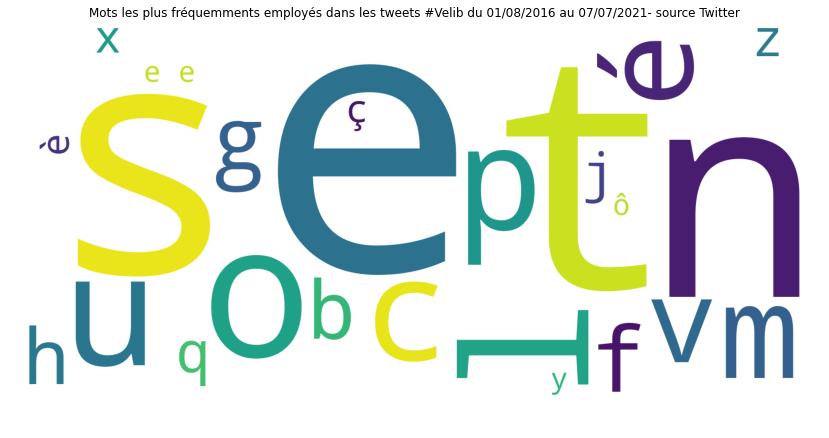

In [51]:
text = mystring

from wordcloud import WordCloud
stopwords= set(STOPWORDS)|{"i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"}

def create_cloud(text):
    x= [i for i in text]
    y= ' '.join(x)
    cloud = WordCloud(background_color='white',width=1600, height=800,max_words=100,stopwords= stopwords).generate(y)
    plt.figure(figsize=(15,7.5))
    plt.axis('off')
    plt.title('Most frequent words in tweets #TooGoodToGo_UK from 01/01/2018 till 30/11/2021- source Twitter')
    plt.imshow(cloud)
    plt.show()

create_cloud(text)